In [319]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import sklearn.preprocessing as sklprep

In [334]:
#loading data
test = pd.read_csv('data/test.csv', index_col='Id')
train = pd.read_csv('data/train.csv', index_col='Id')

y = train.pop('SalePrice')

#concatinating test and train data for analysis
train_test = pd.concat([test, train])
train_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,953.0,953.0,GasA,Ex,Y,SBrkr,953,694,0,1647,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2.0,460.0,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790.0,Rec,163.0,589.0,1542.0,GasA,TA,Y,SBrkr,2073,0,0,2073,1.0,0.0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2.0,500.0,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275.0,Unf,0.0,877.0,1152.0,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0.0,0.0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1.0,252.0,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal


<Figure size 576x1440 with 0 Axes>

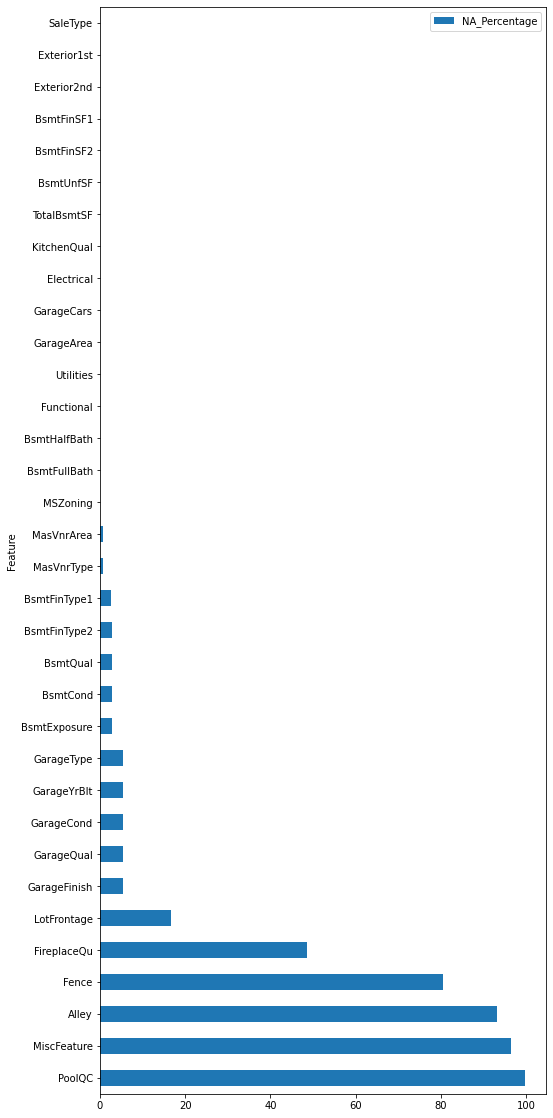

In [321]:
# number of NA's in columns
NAs = {'Feature':[], 'NA_Percentage':[]}
for column in train_test:
  value = train_test[column].isna().sum() 
  if value != 0:
    value = value/train_test.shape[0] * 100
    NAs['Feature'].append(column)
    NAs['NA_Percentage'].append(value)
  

NAs = pd.DataFrame(NAs)
NAs.set_index('Feature', inplace=True)

plt.figure(figsize=(8, 20))
NAs.sort_values(by='NA_Percentage', ascending=False).plot(kind='barh', figsize=(8, 20))


In [322]:
#cleaning columns
DROP_COLUMNS = ['Fence', 'Alley', 'MiscFeature', 'PoolQC']

train_test.drop(columns=DROP_COLUMNS, inplace=True)
train_test.dropna(inplace=True)
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!experimental feature, warning for me

In [323]:
#droping columns that contain 75 or more same value
for column in train_test:
  normalized_unique_value = train_test[column].value_counts(normalize=True).iloc[0]
  if normalized_unique_value >= 0.75:
    train_test.drop(columns=[column], inplace=True)



In [324]:
one_hot_features = []
categorical_features = []
#prepocessing the data
for column in train_test:
  if train_test[column].dtype == 'int64' or train_test[column].dtype == 'float64':
    one_hot_features.append(column)
  elif train_test[column].dtype == 'object':
    categorical_features.append(column)

train_test[one_hot_features] = sklprep.MinMaxScaler().fit_transform(train_test[one_hot_features])

In [325]:
for column in categorical_features:
  print(train_test[column].unique())


['IR1' 'Reg' 'IR2' 'IR3']
['Gilbert' 'NAmes' 'NPkVill' 'NridgHt' 'NoRidge' 'Somerst' 'Sawyer'
 'NWAmes' 'OldTown' 'BrkSide' 'ClearCr' 'SWISU' 'Edwards' 'SawyerW'
 'CollgCr' 'Crawfor' 'Blueste' 'Mitchel' 'Timber' 'MeadowV' 'StoneBr'
 'Blmngtn' 'Veenker' 'IDOTRR' 'BrDale']
['2Story' '1Story' 'SLvl' '1.5Fin' 'SFoyer' '2.5Unf' '1.5Unf' '2.5Fin']
['Gable' 'Hip' 'Flat' 'Gambrel' 'Shed' 'Mansard']
['VinylSd' 'HdBoard' 'MetalSd' 'Plywood' 'CemntBd' 'Wd Sdng' 'AsbShng'
 'WdShing' 'Stucco' 'BrkFace' 'BrkComm' 'Stone' 'ImStucc']
['VinylSd' 'HdBoard' 'MetalSd' 'Brk Cmn' 'CmentBd' 'Plywood' 'ImStucc'
 'Wd Sdng' 'AsbShng' 'Wd Shng' 'Stucco' 'BrkFace' 'AsphShn' 'Other'
 'Stone']
['None' 'BrkFace' 'Stone' 'BrkCmn']
['TA' 'Gd' 'Ex' 'Fa']
['PConc' 'CBlock' 'BrkTil' 'Stone']
['Gd' 'TA' 'Ex' 'Fa']
['No' 'Gd' 'Mn' 'Av']
['GLQ' 'Unf' 'ALQ' 'BLQ' 'LwQ' 'Rec']
['Gd' 'Ex' 'TA' 'Fa']
['TA' 'Gd' 'Ex' 'Fa']
['TA' 'Gd' 'Po' 'Fa' 'Ex']
['Attchd' 'BuiltIn' 'Detchd' 'Basment' '2Types' 'CarPort']
['Fin' 'Unf' 'RFn']


In [332]:
# enc = OrdinalEncoder()
# df[["Sex","Blood", "Study"]] = enc.fit_transform(df[["Sex","Blood", "Study"]])

train_test[categorical_features] = sklprep.OrdinalEncoder().fit_transform(train_test[categorical_features])
train_test[categorical_features] = sklprep.MinMaxScaler().fit_transform(train_test[categorical_features])

In [333]:
train_test

,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1463,0.235294,0.181507,0.058566,0.0,0.333333,0.714286,0.375,0.428571,0.900763,0.800000,0.2,0.833333,0.857143,0.666667,0.000000,1.000000,0.666667,0.666667,1.000000,0.4,0.140149,0.058647,0.129076,0.666667,0.096487,0.339467,0.188965,0.0,0.666667,0.5,0.6,1.000000,0.250000,1.00,0.2,0.881818,0.0,0.333333,0.241327,0.243678,0.059649,0.181818,1.00
1464,0.235294,0.195205,0.040562,0.0,0.333333,0.714286,0.500,0.571429,0.908397,0.800000,0.2,0.833333,0.857143,0.333333,0.012500,1.000000,0.666667,1.000000,1.000000,0.4,0.106662,0.138699,0.128739,0.000000,0.096054,0.328329,0.183913,0.0,0.666667,0.5,0.6,0.666667,0.333333,0.50,0.2,0.890909,0.0,0.333333,0.232278,0.413793,0.063158,0.454545,1.00
1466,0.235294,0.184932,0.040665,0.0,0.333333,0.714286,0.500,0.428571,0.870229,0.733333,0.2,0.333333,0.357143,0.666667,0.000000,1.000000,0.666667,0.666667,1.000000,1.0,0.000000,0.326627,0.101345,0.666667,0.060711,0.431961,0.194220,0.0,0.666667,0.5,0.6,1.000000,0.333333,1.00,0.2,0.845455,0.0,0.333333,0.209653,0.180460,0.147368,0.272727,1.00
1468,0.235294,0.143836,0.033195,0.0,0.333333,0.714286,0.500,0.428571,0.908397,0.800000,0.2,0.833333,0.857143,0.666667,0.000000,1.000000,0.666667,0.666667,1.000000,1.0,0.000000,0.337757,0.105714,0.666667,0.066349,0.327361,0.155821,0.0,0.666667,0.5,0.6,1.000000,0.333333,0.50,0.2,0.890909,0.0,0.333333,0.174208,0.000000,0.131579,0.363636,1.00
1469,0.000000,0.219178,0.041487,1.0,0.333333,0.285714,0.625,0.428571,0.847328,0.666667,0.2,0.333333,0.357143,0.666667,0.000000,1.000000,0.666667,0.666667,0.333333,0.4,0.112863,0.283818,0.191597,0.666667,0.186036,0.000000,0.130760,0.5,0.333333,0.5,0.4,0.666667,0.166667,0.75,0.2,0.818182,1.0,0.333333,0.259427,0.220690,0.000000,0.090909,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0.235294,0.202055,0.040665,1.0,0.208333,0.714286,0.750,0.428571,0.885496,0.766667,0.2,0.833333,0.857143,0.333333,0.273750,0.666667,0.666667,0.666667,1.000000,0.4,0.191176,0.060360,0.178151,0.000000,0.159801,0.421308,0.282134,0.5,0.666667,0.5,0.6,0.666667,0.416667,1.00,0.2,0.863636,0.5,0.333333,0.297134,0.000000,0.114035,1.000000,0.25
1452,0.000000,0.195205,0.037215,1.0,0.875000,0.285714,0.750,0.428571,0.984733,0.983333,0.2,0.250000,0.285714,1.000000,0.121250,0.666667,0.666667,0.666667,1.000000,1.0,0.000000,0.673373,0.237479,0.000000,0.237424,0.000000,0.178658,0.0,0.666667,0.0,0.6,0.000000,0.333333,0.50,0.2,0.981818,0.0,0.666667,0.511312,0.000000,0.063158,0.363636,0.75
1456,0.235294,0.140411,0.030929,1.0,0.333333,0.714286,0.500,0.428571,0.916031,0.833333,0.2,0.833333,0.857143,0.666667,0.000000,1.000000,0.666667,0.666667,1.000000,1.0,0.000000,0.407962,0.133277,0.000000,0.101908,0.336077,0.192603,0.0,0.666667,0.5,0.6,1.000000,0.333333,1.00,0.2,0.900000,0.5,0.333333,0.224736,0.000000,0.070175,0.636364,0.25
